In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 13 09:25:14 2019
Nate Jermain
Random forest analysis for stock delineation for Chub Mackerel
"""

import pandas as pd
import numpy as np

df=pd.read_csv("C:/Users/w10007346/Dropbox/ATC shape analsis project (1)/ACM_ShapeAnalysis/Analysis/wave_shape.csv")

df.head()
orig_resp=df['pop']

####### Data Cleaning ###########
# we will remove any columns with more than 50% missing values.

df.columns.values
len(df.columns.values)

#### Transforming skewed features
# check features for skew
skew_feats=df.drop('pop', axis=1).skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
skewness=skewness[abs(skewness)>0.75].dropna()

# use box cox transformation
from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15

for i in skewed_features:
    df[i]=boxcox1p(df[i],lam)

# check
df.skew().sort_values(ascending=False)# improved

##### Remove duplicate features and NAs
# remove id column
df=df.drop('Unnamed: 0', axis=1)
# response is population
resp=df['pop']
df=df.drop('pop', axis=1)

df.columns.values


# fill in missing values
df.isnull().sum().sort_values(ascending=False)

# remove features with all nas
df=df.drop(['Ws1c1','Ws1c2', 'Ws2c4'], axis=1)

df.isnull().sum().sort_values(ascending=False)

# features with small numbers of nas get filled with means
df.Ws2c3.describe()
df.Ws2c3=df.Ws2c3.fillna(df.Ws2c3.dropna().mean())

df.Ws2c1.describe()
df.Ws2c1=df.Ws2c1.fillna(df.Ws2c1.dropna().mean())

df.isnull().sum().sort_values(ascending=False)
df.Ws3c1.describe()
df.Ws3c1=df.Ws3c1.fillna(df.Ws3c1.dropna().mean())
df.Ws4c10=df.Ws4c10.fillna(df.Ws4c10.dropna().mean())
df.Ws3c4=df.Ws3c4.fillna(df.Ws3c4.dropna().mean())
df.isnull().values.any()

# create response variable as factor
resp=pd.factorize(resp)
resp=resp[0]

# Split into training and test sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df, orig_resp, random_state = 0, test_size=.3)


# make sure test set is balanced
from imblearn.under_sampling import RandomUnderSampler

untest = RandomUnderSampler(return_indices=True)
X_untest, y_untest, id_untest = untest.fit_sample(test_X, test_y)

pd.Series(y_untest).value_counts().plot('bar') # equal sampling now (check)

# prior to resampling
from sklearn.ensemble import RandomForestClassifier

# the model prior to hyperparameter optimization
Best_RFC=RandomForestClassifier(n_estimators=4000, max_features='auto', max_depth=20,
                           min_samples_split=5, min_samples_leaf=1,
                           bootstrap=True, criterion='gini')

Best_RFC.fit(train_X, train_y)

# predict test Y values
ypred=Best_RFC.predict(X_untest)

# apply to test set
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_untest, ypred))

# confusion matrix to evaluate predictions
pd.crosstab(y_untest, ypred, rownames=['Observed'], colnames=['Predicted'])


########### Undersampling of common classes 
import matplotlib.pyplot as plt
fig = plt.figure()
plot= pd.Series(train_y).value_counts().plot('bar', color=['green', 'blue', 'red']) # unbalanced design
fig = plot.get_figure()
fig.savefig('Imbalanced.png', dpi=300) 


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(train_X, train_y)

pd.Series(y_rus).value_counts().plot('bar') # equal sampling now (check)

fig = plt.figure()
plot = pd.Series(y_rus).value_counts().plot('bar', color=['green', 'blue', 'red'])  
fig = plot.get_figure()
fig.savefig('oversamp.png', dpi=300) 

### MODEL

Best_RFC.fit(X_rus, y_rus)

# predict test Y values
ypred=Best_RFC.predict(X_untest)

# apply to test set
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_untest, ypred))

# confusion matrix to evaluate predictions
pd.crosstab(y_untest, ypred, rownames=['Observed'], colnames=['Predicted'])




######## Oversampling of rare classes  ######################
# lets try oversampling too
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(train_X, train_y)

# equal sampling now (check)
fig = plt.figure()
plot = pd.Series(y_ros).value_counts().plot('bar', color=['green', 'blue', 'red'])  
fig = plot.get_figure()
fig.savefig('oversamp.png', dpi=300) 

# fit best model to training dataset
Best_RFC.fit(X_ros, y_ros)

# predict test Y values
ypred=Best_RFC.predict(X_untest)

# apply to test set
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_untest, ypred))

# confusion matrix to evaluate predictions
pd.crosstab(y_untest, ypred, rownames=['Observed'], colnames=['Predicted'])


########## Using SMOTE ##############
from imblearn.over_sampling import SMOTE
smot = SMOTE()
X_smot, y_smot = smot.fit_sample(train_X, train_y)


pd.Series(y_smot).value_counts().plot('bar') # equal sampling now (check)


# fit best model to training dataset
Best_RFC.fit(X_smot, y_smot)

# predict test Y values
ypred=Best_RFC.predict(X_untest)

# apply to test set
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_untest, ypred))

# confusion matrix to evaluate predictions
pd.crosstab(y_untest, ypred, rownames=['Observed'], colnames=['Predicted'])





NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [371]:
#reading from excel 

import pandas as pd
import numpy as np


from pandas import ExcelWriter
from pandas import ExcelFile
df=pd.read_excel('C:\\Users\\Mojtaba\\Projects\\Iris-classification\\family.xlsx', 4)
# df1=pd.read_excel('C:\\Users\\Mojtaba\\Projects\\Iris-classification\\family.xlsx', 3)
# df=pd.read_excel('C:\\Users\\Mojtaba\\Projects\\Iris-classification\\family.xlsx', sheet_name='ali')
# df=df.transpose().reset_index().rename(columns={'index':'Variable'})
# df = df.T

# DF = pd.read_table(df,sep="\t",index_col = [0]).transpose() #Add index_col = [0] to not have index values as own row during transposition
# m, n = DF.shape
# DF.reset_index(drop=False, inplace=True)
# DF.head()
# df['id2'] = df.index
df.set_index('name',inplace=True)
df= df.T
# df.reset_index(drop=True, inplace=True)

# df=df.transpose()
# df.index

# df.columns = df.iloc[0]


# dff=df.to_excel(header=None)
with pd.ExcelWriter('output.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')

df=pd.read_excel('C:\\Users\\Mojtaba\\Projects\\Iris-classification\\output.xlsx',0)
df
# df.describe()
# df.describe
# df = df.set_index('name').T
# df = df.set_index('name').T.reset_index()
# df = df.set_index('name').T.rename_axis('Variable').rename_axis(None, 1).reset_index()
# df
# print (df)
# df.drop(index='Variable')
# df=df.transpose()
# df.drop(index=0)
# df.describe()
# df1.info()
# df.mean()
df.info()
# 
# orig_resp=df['pop']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  162 non-null    object 
 1   age         160 non-null    float64
 2   gender      160 non-null    object 
 3   state       156 non-null    object 
 4   Unnamed: 4  0 non-null      float64
 5   price       158 non-null    float64
 6   salary      160 non-null    float64
 7   come        160 non-null    object 
dtypes: float64(4), object(4)
memory usage: 10.2+ KB


In [372]:
####### Data Cleaning ###########

df.columns.values
len(df.columns.values)


8

In [373]:
#### Transforming skewed features
# check features for skew
# skew_feats=df.drop('pop', axis=1).skew().sort_values(ascending=False)
skew_feats=df.skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
skewness=skewness[abs(skewness)>0.75].dropna()
print(skewness)

            Skew
salary  2.879664
age     0.881071


In [374]:
# use box cox transformation
from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for i in skewed_features:
    df[i]=boxcox1p(df[i],lam)

# check
df.skew().sort_values(ascending=False)# improved

# from scipy import stats
# fer_boxcox=stats.boxcox(df['fertility'])[0]
# print(pd.Series(fer_boxcox).skew())
# sns.distplot(fer_boxcox)
# # for i in skewed_features:
# # df[i],lmbda=boxcox(df[i], lmbda= None )

salary        1.827404
price         0.063942
age          -0.060543
Unnamed: 4         NaN
dtype: float64

In [375]:
# Here’s the python code to find the total number of missing values in each columns.
df.isna().sum()

Unnamed: 0      0
age             2
gender          2
state           6
Unnamed: 4    162
price           4
salary          2
come            2
dtype: int64

In [376]:
# delete a row
# we replace any empty strings in any column with np.nan objects, like so: we take one column "age" because then we want to 
# delete the whole row 
df['age'].replace('', np.nan, inplace=True)
# Now we can drop the null values
df.dropna(subset=['age'], inplace=True)
#let's check
df.isna().sum()

Unnamed: 0      0
age             0
gender          0
state           4
Unnamed: 4    160
price           2
salary          0
come            0
dtype: int64

In [377]:
##### Remove duplicate features and NAs
# remove id column
# df=df.drop('Unnamed: 0', axis=1)
# response is population
# df=df.drop([0,2])
# resp=df['come']
# df1=df.drop( df.columns[1], axis=1, inplace=True)
df1=df.drop(columns='Unnamed: 4')
# df=df.drop('come', axis=1)
print(df1)
# df
# df.columns.values

    Unnamed: 0       age  gender    state     price     salary come
0         muri  4.071754  female  married    1340.0  31.862221  yes
1         wudi  4.697012    male  married    2140.0  33.485383   no
2         jami  3.932510  female      NaN    1100.0  33.856700  yes
3       muri.1  5.527074  female  married    1270.0  31.362625  yes
4         kami  4.201461    male   single       NaN  37.756878   no
..         ...       ...     ...      ...       ...        ...  ...
157      ger.3  6.123681  female  married  110000.0  33.485383  yes
158      dik.3  5.494161    male  married    2153.0  33.856700  yes
159      kil.3  4.597157  female   single    2145.0  31.362625   no
160      kef.3  3.128239  female  married    9850.0  35.236027  yes
161      fev.3  4.597157    male  married    1850.0  42.719213   no

[160 rows x 7 columns]


In [378]:
# Here’s a little Python code that replaces all the objects entries with a number.
df1['gender']=df1['gender'].map({'male':0,'female':1})
df1['state']=df1['state'].map({'single':0,'married':1})
df1['come']=df1['come'].map({'no':0,'yes':1})
print(df1)

    Unnamed: 0       age  gender  state     price     salary  come
0         muri  4.071754       1    1.0    1340.0  31.862221     1
1         wudi  4.697012       0    1.0    2140.0  33.485383     0
2         jami  3.932510       1    NaN    1100.0  33.856700     1
3       muri.1  5.527074       1    1.0    1270.0  31.362625     1
4         kami  4.201461       0    0.0       NaN  37.756878     0
..         ...       ...     ...    ...       ...        ...   ...
157      ger.3  6.123681       1    1.0  110000.0  33.485383     1
158      dik.3  5.494161       0    1.0    2153.0  33.856700     1
159      kil.3  4.597157       1    0.0    2145.0  31.362625     0
160      kef.3  3.128239       1    1.0    9850.0  35.236027     1
161      fev.3  4.597157       0    1.0    1850.0  42.719213     0

[160 rows x 7 columns]


In [379]:
# fill in missing values
df=df1
# df.isnull().sum().sort_values(ascending=False)

# remove features with all nas
# df=df.drop(['Ws1c1','Ws1c2', 'Ws2c4'], axis=1)

df.isnull().sum().sort_values(ascending=False)
df

,Unnamed: 0,age,gender,state,price,salary,come
0,muri,4.071754,1,1.0,1340.0,31.862221,1
1,wudi,4.697012,0,1.0,2140.0,33.485383,0
2,jami,3.932510,1,NaN,1100.0,33.856700,1
3,muri.1,5.527074,1,1.0,1270.0,31.362625,1
4,kami,4.201461,0,0.0,NaN,37.756878,0
...,...,...,...,...,...,...,...
157,ger.3,6.123681,1,1.0,110000.0,33.485383,1
158,dik.3,5.494161,0,1.0,2153.0,33.856700,1
159,kil.3,4.597157,1,0.0,2145.0,31.362625,0
160,kef.3,3.128239,1,1.0,9850.0,35.236027,1


In [380]:
# features with small numbers of nas get filled with means
df.price.describe()
df.price=df.price.fillna(df.price.dropna().mean())
df.state.describe()
# max for binary values
df.state=df.state.fillna(df.state.dropna().max())
df.isnull().values.any()
df

,Unnamed: 0,age,gender,state,price,salary,come
0,muri,4.071754,1,1.0,1340.000000,31.862221,1
1,wudi,4.697012,0,1.0,2140.000000,33.485383,0
2,jami,3.932510,1,1.0,1100.000000,33.856700,1
3,muri.1,5.527074,1,1.0,1270.000000,31.362625,1
4,kami,4.201461,0,0.0,78422.075949,37.756878,0
...,...,...,...,...,...,...,...
157,ger.3,6.123681,1,1.0,110000.000000,33.485383,1
158,dik.3,5.494161,0,1.0,2153.000000,33.856700,1
159,kil.3,4.597157,1,0.0,2145.000000,31.362625,0
160,kef.3,3.128239,1,1.0,9850.000000,35.236027,1


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 161
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  160 non-null    object 
 1   age         160 non-null    float64
 2   gender      160 non-null    int64  
 3   state       160 non-null    float64
 4   price       160 non-null    float64
 5   salary      160 non-null    float64
 6   come        160 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 10.0+ KB


In [407]:
# create response variable as factor
resp=df['come'].values
# resp=resp[0]
# resp
df2= df.iloc[:, 1:-1]
df2
print(df2)
print(resp)
# features=df.loc[:,df.columns!='come'].values
# print(features)
# how do I specify my response variable?

          age  gender  state          price     salary
0    4.071754       1    1.0    1340.000000  31.862221
1    4.697012       0    1.0    2140.000000  33.485383
2    3.932510       1    1.0    1100.000000  33.856700
3    5.527074       1    1.0    1270.000000  31.362625
4    4.201461       0    0.0   78422.075949  37.756878
..        ...     ...    ...            ...        ...
157  6.123681       1    1.0  110000.000000  33.485383
158  5.494161       0    1.0    2153.000000  33.856700
159  4.597157       1    0.0    2145.000000  31.362625
160  3.128239       1    1.0    9850.000000  35.236027
161  4.597157       0    1.0    1850.000000  42.719213

[160 rows x 5 columns]
[1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 1

In [384]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df2, resp, random_state = 0, test_size=.3) #stratify=resp
# x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

0


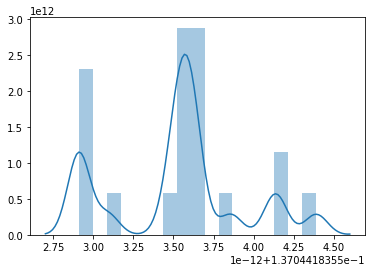

In [409]:
from scipy import stats
import seaborn as sns
ferr_boxcox=stats.boxcox(df['salary'])[0]
print(pd.Series(ferr_boxcox).skew())
# ferr_boxcox
# sns.distplot(salary)
sns.distplot(ferr_boxcox)
# for i in skewed_features:
# df[i],lmbda=boxcox(df[i], lmbda= None )

In [396]:

# make sure test set is balanced
from imblearn.under_sampling import RandomUnderSampler

untest = RandomUnderSampler()
X_untest, y_untest, id_untest = untest.fit_sample(test_X, test_y)

pd.Series(y_untest).value_counts().plot(kind='bar') # equal sampling now (check)

ValueError: not enough values to unpack (expected 3, got 2)

In [310]:
# prior to resampling
from sklearn.ensemble import RandomForestClassifier

# the model prior to hyperparameter optimization
Best_RFC=RandomForestClassifier(n_estimators=4000, max_features='auto', max_depth=20,
                           min_samples_split=5, min_samples_leaf=1,
                           bootstrap=True, criterion='gini')

Best_RFC.fit(train_X, train_y)

# could not convert string to float:??

ValueError: could not convert string to float: 'wudi'

NameError: name 'y_rus' is not defined

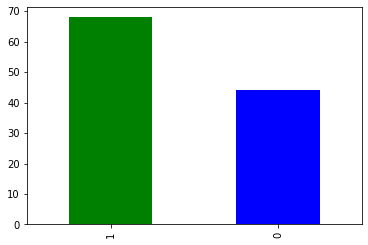

<Figure size 432x288 with 0 Axes>

In [390]:

########### Undersampling of common classes 
import matplotlib.pyplot as plt
fig = plt.figure()
plot= pd.Series(train_y).value_counts().plot(kind='bar', color=['green', 'blue', 'red']) # unbalanced design
fig = plot.get_figure()
fig.savefig('Imbalanced.png', dpi=300) 


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus, id_rus = rus.fit_sample(train_X, train_y)

pd.Series(y_rus).value_counts().plot('bar') # equal sampling now (check)
# #Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

fig = plt.figure()
plot = pd.Series(y_rus).value_counts().plot(kind='bar', color=['green', 'blue', 'red'])  
fig = plot.get_figure()
fig.savefig('oversamp.png', dpi=300) 

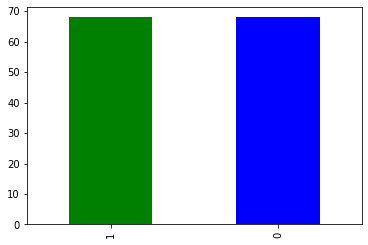

In [392]:

######## Oversampling of rare classes  ######################
# lets try oversampling too
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(train_X, train_y)

# equal sampling now (check)
fig = plt.figure()
plot = pd.Series(y_ros).value_counts().plot(kind='bar', color=['green', 'blue', 'red'])  
fig = plot.get_figure()
fig.savefig('oversamp.png', dpi=300) 


In [393]:

# fit best model to training dataset
Best_RFC.fit(X_ros, y_ros)

# predict test Y values
ypred=Best_RFC.predict(X_untest)

# apply to test set
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_untest, ypred))

# confusion matrix to evaluate predictions
pd.crosstab(y_untest, ypred, rownames=['Observed'], colnames=['Predicted'])



NameError: name 'X_untest' is not defined

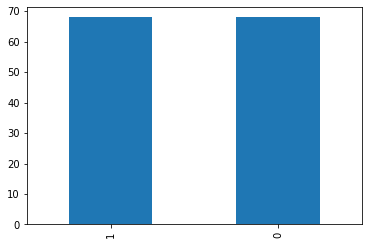

In [395]:
########## Using SMOTE ##############
from imblearn.over_sampling import SMOTE
smot = SMOTE()
X_smot, y_smot = smot.fit_sample(train_X, train_y)


pd.Series(y_smot).value_counts().plot(kind='bar') # equal sampling now (check)